**Задание**  

При фиксированном seed=42 поразбирайтесь и поэкспериментируйте с параметрами алгоритма дифференциальной эволюции:  
strategy, popsize, tol, mutation, recombination и updating.  

Постройте графики количества итераций оптимизации функции ackley от значения параметра.  

***Допзадание***  

Найти множество параметров (strategy=..., ..., updating=...), которые требуют минимального количества итераций.

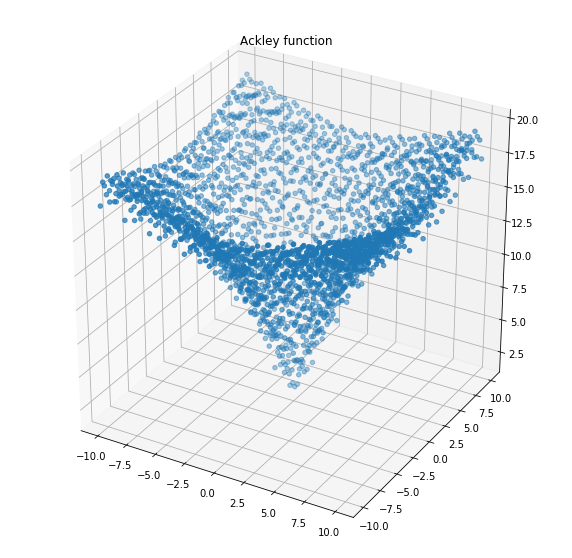

In [1]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import differential_evolution

def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

x = []
y = []
z = []
pts = 50
for i in np.linspace(bounds[0][0], bounds[0][1], pts):
    for j in np.linspace(bounds[1][0], bounds[1][1], pts):
        x.append(i)
        y.append(j)
        z.append(ackley([i, j]))

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(x, y, z)
ax.set_title("Ackley function")
plt.show()

In [2]:
result = differential_evolution(ackley, bounds, seed=42)
print(f"Итераций: {result.nit}")

Итераций: 90


Минимум итераций: 90, stategy = 'best1bin'.


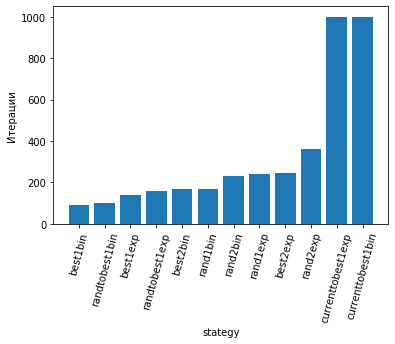

In [3]:
strategies = ["best1bin", "best1exp", "rand1exp", "randtobest1exp", "currenttobest1exp", "best2exp",
    "rand2exp", "randtobest1bin", "currenttobest1bin", "best2bin", "rand2bin", "rand1bin"]
st = {}
for strategy in strategies:
    p = differential_evolution(ackley, bounds, seed=42, strategy=strategy)
    st[strategy] = p.nit
st = {k: v for k, v in sorted(st.items(), key=lambda item: item[1])}

mk_st = min(st, key=st.get)
mv_st = st[mk_st]
print(f"Минимум итераций: {mv_st}, stategy = '{mk_st}'.")
plt.bar(list(st.keys()), list(st.values()))
plt.xlabel("stategy")
plt.ylabel("Итерации")
plt.xticks(rotation=75)
plt.show()

При popsize < 5 результат отличен от x = [0, 0].
Минимум итераций: 87, popsize = 7.


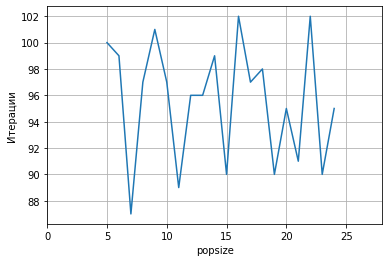

In [4]:
popsizes = [x for x in range(5, 25)]
po = {}
for popsize in popsizes:
    p = differential_evolution(ackley, bounds, seed=42, popsize=popsize)
    po[popsize] = p.nit

print("При popsize < 5 результат отличен от x = [0, 0].")
mk_po = min(po, key=po.get)
mv_po = po[mk_po]
print(f"Минимум итераций: {mv_po}, popsize = {mk_po}.")
plt.plot(list(po.keys()), list(po.values()))
plt.xlabel("popsize")
plt.ylabel("Итерации")
plt.xlim(0, 28)
plt.grid()

При tol > ~0.31 результат отличен от x = [0, 0].
Минимум итераций: 90, tol = 0.0.


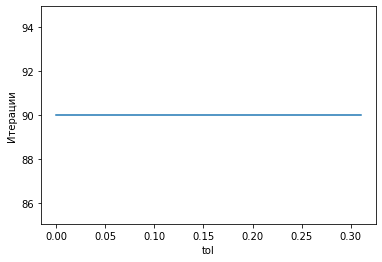

In [5]:
tols = np.linspace(0, 0.31, 32)
to = {}
for tol in tols:
    p = differential_evolution(ackley, bounds, seed=42, tol=tol)
    to[tol] = p.nit

print("При tol > ~0.31 результат отличен от x = [0, 0].")
mk_to = min(to, key=to.get)
mv_to = to[mk_to]
print(f"Минимум итераций: {mv_to}, tol = {mk_to}.")
plt.plot(list(to.keys()), list(to.values()))
plt.xlabel("tol")
plt.ylabel("Итерации")
plt.show()

При mutation < ~0.2 результат отличен от x = [0, 0].
Минимум итераций: 28, mutation = 0.2.


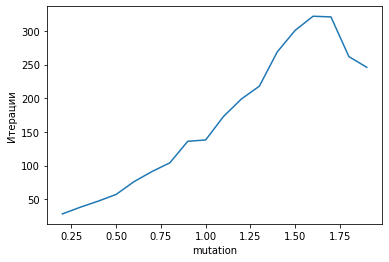

In [6]:
mutations = np.linspace(0.2, 1.9, 18)
mu = {}
for mutation in mutations:
    p = differential_evolution(ackley, bounds, seed=42, mutation=mutation)
    mu[mutation] = p.nit
        
print("При mutation < ~0.2 результат отличен от x = [0, 0].")
mk_mu = min(mu, key=mu.get)
mv_mu = mu[mk_mu]
print(f"Минимум итераций: {mv_mu}, mutation = {mk_mu}.")
plt.plot(list(mu.keys()), list(mu.values()))
plt.xlabel("mutation")
plt.ylabel("Итерации")
plt.show()

Минимум итераций: 82, recombination = 1.0.


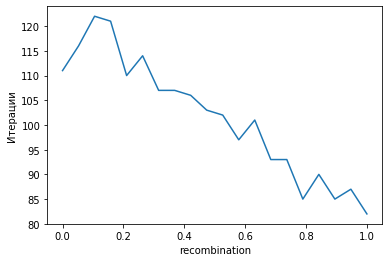

In [7]:
recombinations = np.linspace(0, 1, 20)
re = {}
for recombination in recombinations:
    p = differential_evolution(ackley, bounds, seed=42, recombination=recombination)
    re[recombination] = p.nit
        
mk_re = min(re, key=re.get)
mv_re = re[mk_re]
print(f"Минимум итераций: {mv_re}, recombination = {mk_re}.")
plt.plot(list(re.keys()), list(re.values()))
plt.xlabel("recombination")
plt.ylabel("Итерации")
plt.show()

Минимум итераций: 90, updating = 'immediate'.


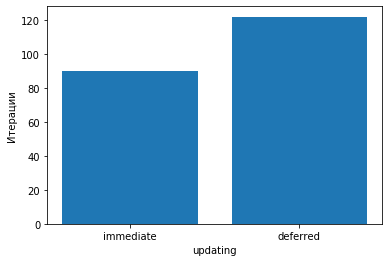

In [8]:
updatings = ["immediate", "deferred"]
up = {}
for updating in updatings:
    p = differential_evolution(ackley, bounds, seed=42, updating=updating)
    up[updating] = p.nit

mk_up = min(up, key=up.get)
mv_up = up[mk_up]
print(f"Минимум итераций: {mv_up}, updating = '{mk_up}'.")
plt.bar(list(up.keys()), list(up.values()))
plt.xlabel("updating")
plt.ylabel("Итерации")
plt.show()

In [9]:
result = differential_evolution(ackley, bounds, seed=42,
    strategy=mk_st, popsize=mk_po, tol=mk_to, mutation=mk_mu, recombination=mk_re, updating=mk_up)
print(f"Набор (strategy='{mk_st}', popsize={mk_po}, tol={mk_to}, mutation={mk_mu}, recombination={mk_re}, updating='{mk_up}').")
print(f"Минимальное значение итераций по всем параметрам: {result.nit}.")

Набор (strategy='best1bin', popsize=7, tol=0.0, mutation=0.2, recombination=1.0, updating='immediate').
Минимальное значение итераций по всем параметрам: 24.
